In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = {
    'Sample ID': ['S1', 'S2', 'S3', 'S4', 'S5'],
    'Quartz (%)': [45, 50, 55, 60, 65],
    'Feldspar (%)': [30, 25, 20, 15, 10],
    'Mica (%)': [25, 25, 25, 25, 25]
}

In [16]:
df = pd.DataFrame(data)

In [17]:
average_composition = df.mean(numeric_only=True)

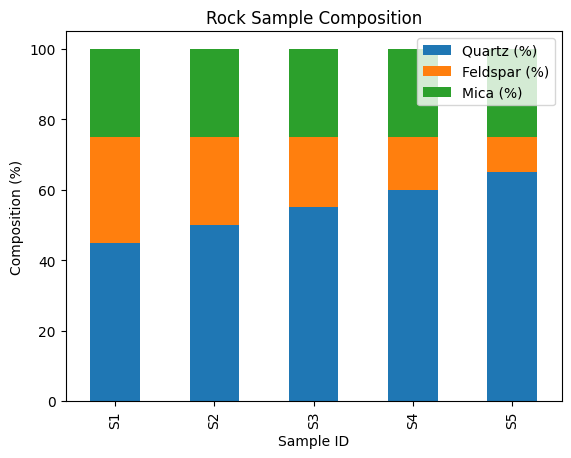

Average Composition:
Quartz (%)      55.0
Feldspar (%)    20.0
Mica (%)        25.0
dtype: float64


In [18]:
df.plot(x='Sample ID', kind='bar', stacked=True)
plt.title('Rock Sample Composition')
plt.xlabel('Sample ID')
plt.ylabel('Composition (%)')
plt.legend(loc='upper right')
plt.show()
print("Average Composition:")
print(average_composition)